In [128]:
import pandas as pd
import numpy as np
import easier as ezr
import lifelines as ll
pd.options.display.max_columns = 300
pd.options.display.max_rows = 300
%config Completer.use_jedi = False

In [140]:
class Loader(ezr.pickle_cache_mixin):
    def __init__(self, which='treatment'):
        if which == 'treatment':
            self.tab = 'treatments'
        else:
            self.tab = 'starved'
        
    
    
    @ezr.cached_container
    def df_raw(self):
        gsheet = ezr.GSheet('pseudoscorpion_data_sheet', self.tab)
        df = gsheet.to_dataframe()
        df.columns = ezr.slugify(df.columns)
        return df
    
    @ezr.cached_container
    def df(self):
        df = self.df_raw
        
        df.loc[:, 'start_date'] = df.start_date.astype(np.datetime64)
        df = df.set_index(['id', 'trial', 'start_date'])
        df = df.T.reset_index().rename(columns={'index': 'observation_date'}).sort_index()
        # df = df.sort_index(axis=1)
        df.iloc[:, 0] = (df.iloc[:, 0].str.replace('_', ' ') + ' 2020').astype(np.datetime64)
        df = df.replace(r'^\s*$', np.NaN, regex=True)
        # df = df.set_index[('observation_date', '')]
        df = df.set_index(('observation_date', '', np.NaN))

        df.index.name = 'date'

        lol = []
        for col_ind in range(df.shape[1]):
            ser = df.iloc[:, col_ind].dropna()
            sample_id = df.columns[col_ind][0]
            treatment = df.columns[col_ind][1]
            term_date = ser.index[-1]
            is_alive = ser[-1]
            start_date = df.columns[col_ind][-1]
            lol.append([sample_id, treatment, start_date, term_date, is_alive])

        dfx = pd.DataFrame(lol, columns=['sample_id', 'treatment', 'start_date', 'term_date', 'is_alive'])
        dfx['duration'] = (dfx.term_date - dfx.start_date).dt.days
        dfx['died'] = (1 - dfx.is_alive).astype(int)
        dfx.loc[:, 'sample_id'] = dfx.sample_id.str.strip().str.replace(r'\s+', '', regex=True)
        dfx.loc[:, 'treatment'] = dfx.treatment.str.strip().str.replace(r'\s+', '', regex=True)
        dfx = dfx[['sample_id', 'treatment', 'duration', 'died']]
        return dfx
loader = Loader()     
loader.df.head()

,sample_id,treatment,duration,died
0,OC98,H,7,1
1,OC93,H,26,0
2,OC92,H,26,0
3,OC78,H,26,0
4,OC73,H,1,1


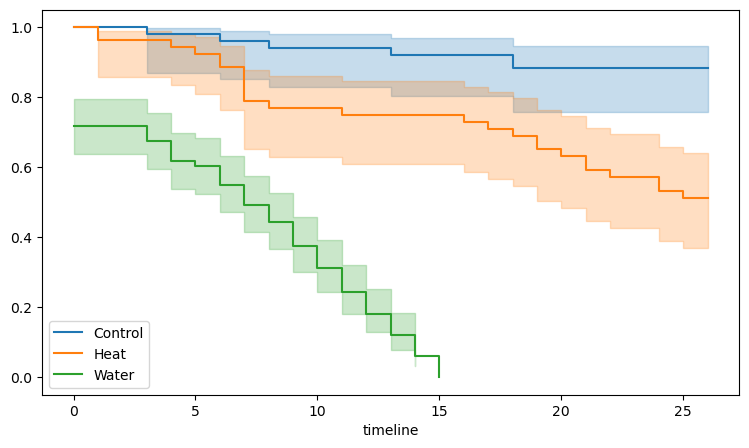

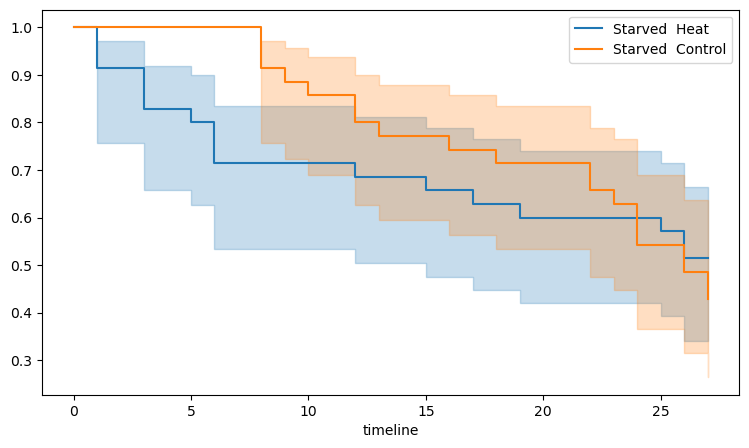

In [158]:
ax = ezr.figure()

loader = Loader(which='treatment') 
df = loader.df
dfc = df[df.treatment == 'C']
kmc_fitter = ll.KaplanMeierFitter()
kmc_fitter.fit(dfc.duration, event_observed=dfc.died, label='Control')
kmc_fitter.plot_survival_function(ax=ax)

dfh = df[df.treatment == 'H']
kmh_fitter = ll.KaplanMeierFitter()
kmh_fitter.fit(dfh.duration, event_observed=dfh.died, label='Heat')
kmh_fitter.plot_survival_function(ax=ax)

dfw = df[df.treatment == 'W']
kmw_fitter = ll.KaplanMeierFitter()
kmw_fitter.fit_left_censoring(dfw.duration, event_observed=dfw.died, label='Water')
# kmw_fitter.fit(dfw.duration, event_observed=dfw.died, label='Water')
kmw_fitter.plot_survival_function(ax=ax)

ax = ezr.figure()
loader = Loader(which='starved')
df = loader.df

dfhs = df[df.treatment == 'HS']
kmhs_fitter = ll.KaplanMeierFitter()
kmhs_fitter.fit(dfhs.duration, event_observed=dfhs.died, label='Starved  Heat')
kmhs_fitter.plot_survival_function(ax=ax)


dfcs = df[df.treatment == 'CS']
kmcs_fitter = ll.KaplanMeierFitter()
kmcs_fitter.fit(dfcs.duration, event_observed=dfcs.died, label='Starved  Control')
kmcs_fitter.plot_survival_function(ax=ax)

# ax.set_yscale('log')




In [145]:
loader = Loader(which='starved')
loader.df

,sample_id,treatment,duration,died
0,OC93,HS,26,1
1,OC92,HS,6,1
2,OC91,HS,27,0
3,OC74,HS,27,0
4,OC7,HS,27,0
5,OC57,HS,27,0
6,OC5,HS,27,0
7,OC48,HS,19,1
8,OC43,HS,5,1
9,OC41,HS,6,1
